<a href="https://colab.research.google.com/github/mvharsh/Deep-Learning/blob/main/Movie_Review_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
! curl -O https://raw.githubusercontent.com/SK7here/Movie-Review-Sentiment-Analysis/master/IMDB-Dataset.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63.1M  100 63.1M    0     0  12.8M      0  0:00:04  0:00:04 --:--:-- 17.1M


In [ ]:
#Load the Resturant Reviews Data Set to a Numpy Array.
review_data = pd.read_csv("IMDB-Dataset.csv")
review_data = np.array(review_data)

In [ ]:
# Define the HyperParameters.
vocab_size = 10000
embedding_dim = 128
max_length = 500
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
num_epochs = 30

In [ ]:
#Sepetate the Labels and the Reviews to X and y variables.
X = review_data[:,0]
y = review_data[:,1]

# Map string labels to numerical labels
label_mapping = {'negative': 0, 'positive': 1}
y_encoded = np.array([label_mapping[label] for label in y])

In [ ]:
#Performing test train split with SKlearn
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42)

In [ ]:
#Saving the training vocabulary for later use.

# Convert NumPy arrays to Python lists
X_train_list = X_train.tolist()

# Write to JSON file
with open('Vocabulary.json', 'w') as json_file:
    json.dump(X_train_list, json_file)

In [ ]:
#Using the Tensor Flow Tokenizer to generate the Word index
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [ ]:
#Using the Tensor Flow Tokenizer to generate the numeric sequences
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
#Converting the labels and sequences to Numpy Array

training_padded = np.array(training_padded).astype(np.float32)
training_labels = np.array(y_train).astype(np.float32)
testing_padded = np.array(testing_padded).astype(np.float32)
testing_labels = np.array(y_test).astype(np.float32)

In [ ]:
#Creating the ANN with Embedding Layer to perform the classification

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.00004)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
#Model Preview
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                        

In [ ]:
from keras.callbacks import ModelCheckpoint
# Define a file path where the best model will be saved
filepath = 'sentiment_analysis_model.h5'
# Define the ModelCheckpoint callback to monitor validation accuracy and save the best model
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#Training the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2,callbacks=[checkpoint])

Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.72710, saving model to sentiment_analysis_model.h5
1250/1250 - 64s - loss: 0.6833 - accuracy: 0.6330 - val_loss: 0.6399 - val_accuracy: 0.7271 - 64s/epoch - 51ms/step
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.72710 to 0.86580, saving model to sentiment_analysis_model.h5
1250/1250 - 17s - loss: 0.4908 - accuracy: 0.8261 - val_loss: 0.3678 - val_accuracy: 0.8658 - 17s/epoch - 14ms/step
Epoch 3/30

Epoch 3: val_accuracy improved from 0.86580 to 0.88150, saving model to sentiment_analysis_model.h5
1250/1250 - 11s - loss: 0.3199 - accuracy: 0.8793 - val_loss: 0.2991 - val_accuracy: 0.8815 - 11s/epoch - 9ms/step
Epoch 4/30

Epoch 4: val_accuracy improved from 0.88150 to 0.88740, saving model to sentiment_analysis_model.h5
1250/1250 - 10s - loss: 0.2739 - accuracy: 0.8938 - val_loss: 0.2777 - val_accuracy: 0.8874 - 10s/epoch - 8ms/step
Epoch 5/30

Epoch 5: val_accuracy improved from 0.88740 to 0.89350, saving model to sentiment_analysis_model.h5
1250/1250 - 8s - loss: 0.2504 - accuracy: 0.9035 - val_loss: 0.2643 - val_accuracy: 0.8935 - 8s/epoch - 6ms/step
Epoch 6/30

Epoch 6: val_accuracy improved from 0.89350 to 0.89730, saving model to sentiment_analysis_m

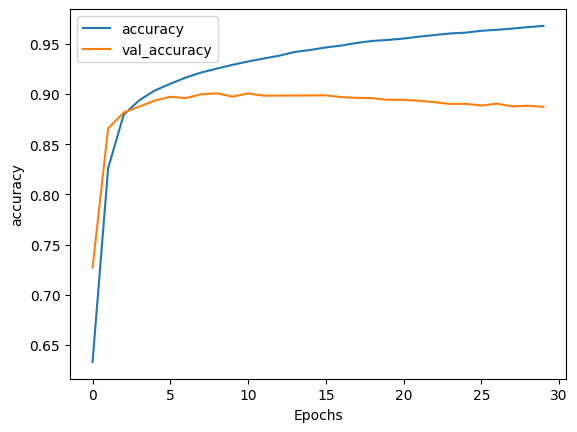

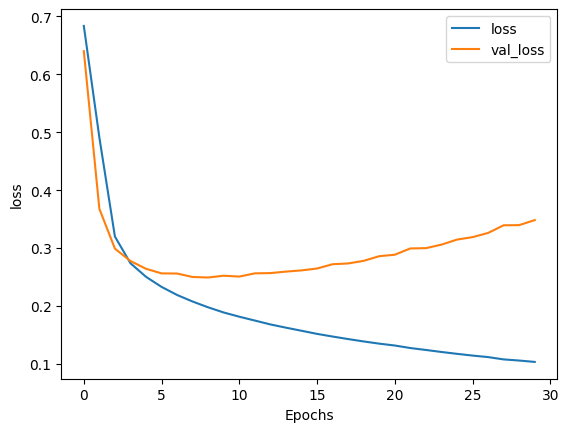

In [ ]:
#Plotting the Accuracy and Loss factors
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
#Loading back the best model
model = keras.models.load_model(filepath)

In [ ]:
from sklearn.metrics import accuracy_score
# Printing accuracy
X_sequences = tokenizer.texts_to_sequences(X_test)
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
y_pred = model.predict(X_padded)
y_pred_classes = (y_pred > 0.5)
accuracy = accuracy_score(y_test.reshape(-1,1).astype(int), y_pred_classes.reshape(-1,1).astype(int))
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9007


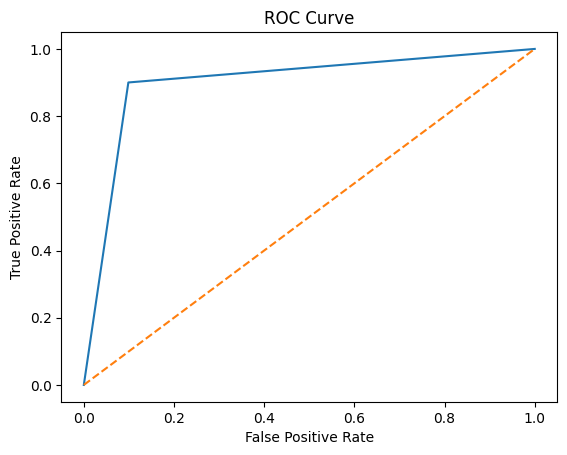

In [ ]:
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score
# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test.reshape(-1,1).astype(int), y_pred_classes.reshape(-1,1).astype(int))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

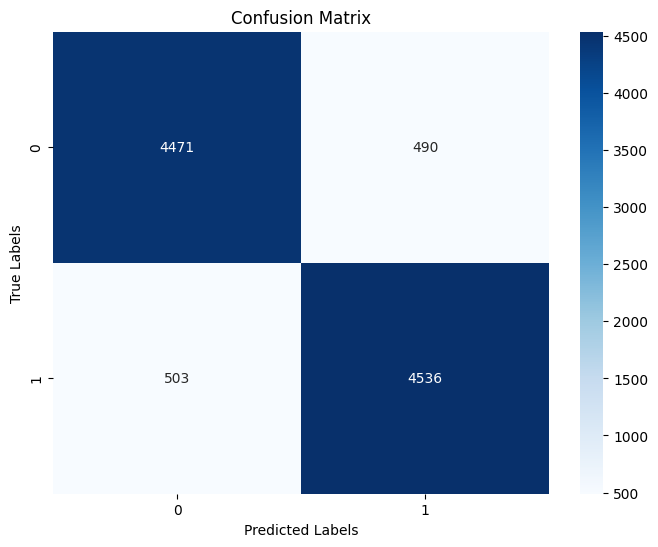

In [ ]:
import seaborn as sns
# Plotting confusion matrix
cm = confusion_matrix(y_test.reshape(-1,1).astype(int), y_pred_classes.reshape(-1,1).astype(int))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Calculate and print the classification report
print(classification_report(y_test.reshape(-1,1).astype(int), y_pred_classes.reshape(-1,1).astype(int)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4961
           1       0.90      0.90      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
# Testing the model on some movie-related sentences
movie_reviews = [
    "The plot was quite engaging and kept me on the edge of my seat throughout the movie.",
    "The special effects were top-notch, making the movie visually stunning.",
    "I found the acting to be mediocre and the storyline predictable.",
]

# Tokenize and pad the movie reviews
sequences = tokenizer.texts_to_sequences(movie_reviews)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Predict the sentiment of the movie reviews
sentiment_predictions = model.predict(padded)
print(sentiment_predictions)


1/1 [==============================] - 0s 21ms/step
[[0.6608803 ]
 [0.65656626]
 [0.11528616]]
